# Exponentielle Regression

Nachdem wir uns im letzten Kapitel mit der Analyse von Daten beschäftigt haben, die nach einem linearen Gesetz verteilt sind, wenden wir uns diese Woche Daten zu, die einem exponentiellen Gesetz folgen. Unser Alltag ist durchdrungen von exponentiellen Prozessen. Typische Beispiele sind

* die Wachstumsgeschwindigkeit von Mikroorganismen,
* die Reaktionsgeschwindigkeit chemischer Prozesse oder 
* die Verzinsung von Kapitalanlagen.

Glücklicherweise kann die Bestimmung des Modells für die Exponentialfunktion auf das Problem der linearen Regression zurückgeführt werden, aber dazu später mehr. Zunächst wiederholen wir das Thema Exponentialfunktionen und beschäftigen uns mit dem Loagrithmus.


## Exponentialfunktion

Unter einer **Exponentialfunktion** versteht man eine Funktion, bei der die Variable $x$ im Exponenten steht. Damit wird dann eine feste Zahl $b$, die sogenannte Basis potenziert. Wählen wir für $b=1$, so können wir für $x$ jede beliebige Zahl einsetzen, aber das Ergebnis wird immer 1 sein. Daher schließen wir für die Basis $b$ die 1 aus und insgesamt muss $b$ positiv sein. Wir halten also fest:

Eine Funktion $f$ der Form

$$f(x)=b^x, \quad b>0, b\neq 1$$

heißt Exponentialfunktion mit Basis $b$. 

Als nächstes lassen wir die Exponentialfunktion mit der Basis $b=2$ für das Intervall $[-3,3]$ zeichnen:

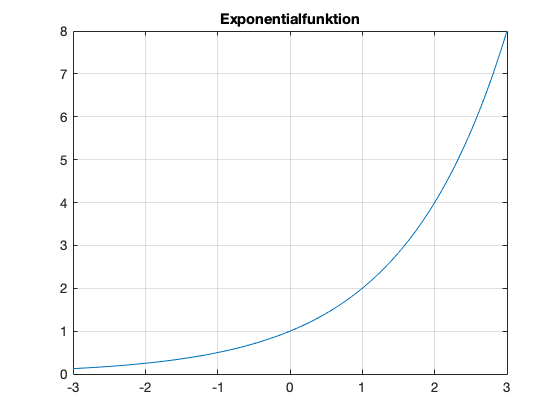

In [5]:
% Wahl der festen Basis b
b = 2;

% Erzeugung x-Werte und dazugehörige y-Werte
x = linspace(-3, 3);
y = b .^ x;

% Plot
figure();
plot(x,y);
grid on;
title('Exponentialfunktion');

```{exercise}
:label: exercise_11_01
Lassen Sie MATLAB die Exponentialfunktionen für $b=0.5$ und $b=2$ zeichnen. Welche Gemeinsamkeit haben die beiden Funktionen? Lassen Sie zusätzlich noch die Exponentialfunktionen für $b=\frac{2}{3}$ und $b=\frac{3}{2}$ zeichnen. Was fällt Ihnen auf?
```
````{solution} exercise_11_01
:label: solution_11_01
:class: dropdown
```matlab
% Erzeugung x-Werte und dazugehörige y-Werte
x = linspace(-3, 3);

% Plot
figure();
for b = [0.5, 2, 2/3, 3/2]
    y = b .^ x;
    plot(x,y, linewidth=2);
    hold on
end
legend('0.5','2','2/3','3/2')
grid on;
title('Exponentialfunktion für verschiedene Basen');
```
````

Exponentialfunktionen wurden 2020/21 in der Öffentlichkeit so intensiv wie nie zuvor diskutiert, denn Wachstumsprozesse, die durch Multiplikation mit einem Faktor beschrieben werden, sind exponentiell.

Beispiel:
Angenommen, 1 Mensch ist mit Corona infiziert. Jeden Tag wächst die Anzahl der Infizierten um den Faktor 1.1892 (das entspricht der Omikron-Variante im Januar 2022). Dann würde die Anzahl der Infizierten folgendermaßen wachsen:
1 -->  1.1892 --> 1.4142 --> 1.6818 --> 2.0000 --> 2.3783 --> 2.8282 --> 3.3634 --> ...
Natürlich gibt es nur ganzzahlige Menschen. Interpretieren wir $b=1.1892$ also eher in dem Sinne, dass nach 4 Tagen sich die Anzahl der Infizierten verdoppelt hat. 

Am besten lassen wir MATLAB die dazugehörige Wachstumsfunktion für einen Monat von 30 Tagen zeichnen:

$$f(x)=1.1892^{x}.$$


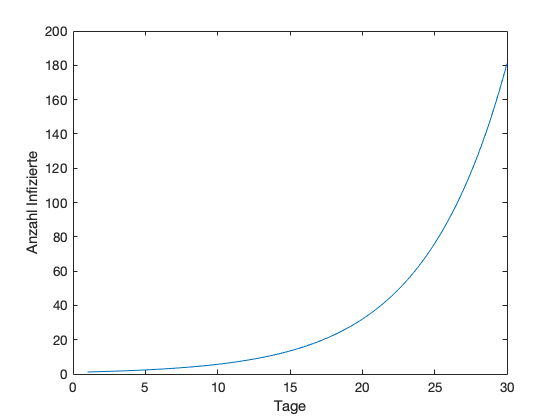

In [4]:
% 30 Tage
x  = linspace(1, 30);

% "R-Wert" b = 1.1892
b = 1.1892;
y = b.^x;

% Plot
figure();
plot(x, y);
xlabel('Tage');
ylabel('Anzahl Infizierte');

Selbst wenn wir nur mit einer infizierten Person starten, haben sich nach 30 Tagen 181 Personen angesteckt. Was aber, wenn wir mit 3 Infizierten starten?

$$3 \rightarrow 3.5675 \rightarrow 4.2426 \rightarrow 5.0453 \rightarrow 5.999 \rightarrow \ldots$$
was (bis auf kleine Rundungsfehler)

$$3\cdot 1 \rightarrow 3\cdot 1.1892 \rightarrow 3\cdot 1.4142 \rightarrow 3\cdot 1.6812 \rightarrow \ldots$$

entspricht. Wir erhalten also die Funktion

$$f(x) = 3\cdot 1.1892^x.$$

Diese Schreibweise für Exponentialfunktionen beschreibt exponentielle Wachstums- oder Zerfallsprozesse sehr gut. Anstatt der Variablen $x$ nehmen wir die Variable $t$, um auszudrücken, dass sich eine Größe $f$  mit der Zeit $t$ (time) verändert und dabei soll die Zeit $t\geq 0$ sein. Der Veränderungsprozess beginnt also zur Zeit $t=0$ bzw. wird ab dem Zeitpunkt $t=0$ beobachtet/gemessen. Der Anfangszustand der Größe $f$ zum Zeitpunkt $t=0$ wird mit $f_0$ bezeichnet. Es gilt dann

$$f(t) = f_0\cdot b^t, \quad t \geq 0.$$

* **Exponentieller Zerfall**: Wenn die Basis $b$ kleiner als 1 ist, also $0<b<1$ gilt, nimmt die Größe $f$ ab.
* **Exponentielles Wachstum**: Wenn $b$ größer als 1 ist, also $b>1$ gilt, dann nimmt die Größe $f$ zu.

Ein Modell für exponentielles Wachstum $f(t)=f_0\cdot b^t$ hat also zwei Parameter:
* Anfangswert $f_0$ und
* Basis $b$.
Aber welcher Parameter beeinflusst die Veränderung stärker, welcher ist wichtiger?  

```{exercise}
:label: exercise_11_02
1. Plotten Sie die exponentielle Wachstumsfunktion mit $f_0=5$ und $b=2$ für $t\in [0,10]$. Plotten Sie in der gleichen Grafik zwei weitere Funktionen, nämlich exponentielles Wachstum für $f_0=1$ und $f_0=10$. 
2. Plotten Sie die exponentielle Wachstumsfunktion mit $f_0=5$ und $b=2$ für $t\in [0,10]$. Plotten Sie in der gleichen Grafik zwei weitere Funktionen, nämlich exponentielles Wachstum für $b=1.75$ und $b=2.25$. 
Bei welcher Variante wird nach 10 Tagen die Exponentialfunktion den größten Wert haben? Bei $f_0=10. b=2$ oder $f_0=5, b=2.25$? Kommt es mehr auf die Anfangsgröße oder die Basis an?
```
````{solution} exercise_11_02
:label: solution_11_02
:class: dropdown
```matlab
% Hier Ihr Code (für Teilaufgabe 1)
t = linspace(0, 10);
f1 = 5  .* 2.^t;
f2 = 1   .* 2.^t;
f3 = 10  .* 2.^t;

figure();
plot(t, f1);
hold on;
plot(t, f2);
plot(t, f3);

% Hier Ihr Code (für Teilaufgabe 2)
t = linspace(0, 10);
f1 = 5  .* 2.^t;
f2 = 5  .* (1.75).^t;
f3 = 5  .* (2.25).^t;

figure();
plot(t, f1);
hold on;
plot(t, f2);
plot(t, f3);
```
````

## Logarithmusfunktion

Sehr schnell stellt sich bei Prozessen die umgekehrte Frage. Angenommen, ich habe ein exponentielles Wachstum $y = f(x)=1.18^x$, nach wie vielen Tagen x sind 200 Personen infiziert? Die Umkehrung der Exponentialfunktion wird **Logarithmusfunktion** genannt

$$x = \log_{1.18} (y)=\log_{1.18}(1.18^x).$$

Wichtig bei der Logarithmusfunktion ist, dass immer dazugesagt werden muss, welche Exponentialfunktion, also welche Basis $b$ genommen werden soll. Diese beiden Dinge gehören zusammen:

$$x = \log_{b}(y) \quad \Leftrightarrow \quad y = b^x.$$

Wir müssen also den Logarithmus zur Basis 1.18 von 200 ausrechnen, um herauszufinden, nach wie vielen Tagen die 200 Personen infiziert sind. Leider ist in MATLAB die Logarithmusfunktion zur Basis 1.18 nicht implementiert. Dafür gibt es aber einen Trick. Der Logarithmus zur Basis 1.18 von einer Zahl $x$ ist gleich dem Logarithmus zur Basis "Eulersche Zahl" von 1.18 geteilt zum Logarithmus zur Basis "Eulersche Zahl" von 1.18. Als Formel ist das etwas kürzer:

$$\log_{1.18}(x) = \frac{\log_e(x)}{\log_e(1.18)}.$$

Der Logarithmus zur Basis "eulersche Zahl" $e = 2.7182...$ von x ist so wichtig, dass er in MATLAB implementiert ist. Die Funktion heißt einfach nur **log()** und man sagt **natürlicher Logarithmus** dazu.

Jetzt können wir ausrechnen, nach wie vielen Tagen 200 Personen infiziert sind:

In [ ]:
t = log(200) / log(1.18);
fprintf('200 Personen sind nach %g Tagen infiziert.',t);

```{exercise}
:label: exercise_11_03
Zeichnen Sie die natürliche Logarithmusfunktion. Welche x-Werte dürfen Sie nehmen? Welchen Wert hat die natürliche Logarithmusfunktion für $x=1$, also was ist $\log(1)$?
```
````{solution} exercise_11_03
:label: solution_11_03
:class: dropdown
```matlab
% Hier Ihr Code
x = linspace(0, 5);
y = log(x);

figure();
plot(x,y);
grid on;
title('Natürliche Logarithmusfunktion')

log(1)
```
````

```{exercise}
:label: exercise_11_04
Zeichnen Sie die Exponentialfunktion zur Basis $e$ (Anfangswert $f_0=1$) für das Intervall $[-2,2]$. Tipp: in MATLAB heißt diese Funktion exp(). Sie können aber auch e = exp(1) benutzen, um die Eulersche Zahl zu erhalten. 

Welchen Funktionswert $y_{min}=e^{-2}$ erhalten Sie auf der linken Seite des Intervalls und welchen Funktionswert $y_{max}=e^{2}$ auf der rechten Seite des Intervalls? Zeichen Sie danach in das gleiche Diagramm die natürliche Logarithmusfunktion für das Intervall $[y_{min}, y_{max}]$ und die Winkelhalbierende (gestrichelt) für das Intervall $[-2,8]$ ein.
```
````{solution} exercise_11_04
:label: solution_11_04
:class: dropdown
```matlab
% Plot der Exponentialfunktion
x = linspace(-2, 2, 100);
y_exp = exp(x);
figure();
plot(x, y_exp);

% Berechnung der Funktionswerte links und rechts
y_min = exp(-2);
y_max = exp(2);

% Plot der Logarithmusfunktion
x_log = linspace(y_min, y_max)
y_log = log(x_log)

hold on;
plot(x_log, y_log);

x_winkelhalbierende = linspace(-2,8);
y_winkelhalbierende = x_winkelhalbierende;
plot(x_winkelhalbierende, y_winkelhalbierende)

legend('exp', 'log','Winkelhalbierende');
```
````

## Die natürliche Exponentialfunktion

So wie sich jeder Logarithmus egal mit welcher Basis auf den natürlichen Logarithmus zurückführen lässt, so lässt siche jede Exponentialfunktion egal mit welcher Basis auf die "natürliche" Exponentialfunktion mit der Eulerschen Zahl $e$ als Basis zurückführen. Es gilt

$$b^x = e^{\log(b^x)} = e^{x\cdot \log(b)}.$$

```{exercise}
:label: exercise_11_05
Beispiel bakterielle Zellteilung:
Wenn sich aus einer Zelle zwei Zellen bilden, sagt man, dass eine neue Generation entstanden ist. Wir erhalten aus einer Zelle also insgesamt

$$1 \rightarrow 2 \rightarrow  4 \rightarrow  8 \rightarrow 16 \rightarrow 32 \rightarrow  \ldots$$

Zellen.

Stellen Sie die Funktionsgleichung dafür auf und plotten Sie die Anzahl der Zellen für die ersten 7 Generationen. Schreiben Sie anschließend die Exponentialfunktion mit Basis $b=2$ in die "natürliche" Exponentialfunktion exp() um. Plotten Sie anschließend die umgeschriebene Exponentialfunktion gemeinsam mit der ersten in einem Diagramm und vergewissern Sie sich, dass beide Graphen übereinanderliegen.

```
````{solution} exercise_11_05
:label: solution_11_05
:class: dropdown
```matlab
x = linspace(1, 7);
y1 = 2 .^ x;
y2 = exp(log(2)*x);

figure();
plot(x,y1, '-');
hold on;
plot(x,y2);
grid on;
xlabel('Generation');
ylabel('Anzahl Zellen');
```
````

## Exponentielle Regressionsprobleme

Wir beschreiben exponentielle Wachstumsprozesse als

$$f(t)=f_0 \cdot b^t, \quad t\geq 0.$$

Mit der Idee, die allgemeine Exponentialfunktion zur Basis $b$ in die natürliche e-Funktion umzuschreiben, erhalten wir

$$f(t) = f_0 \cdot e^{\log(b)\cdot t}, \quad t\geq 0.$$

Den Faktor $\log(b)$ nennen wir zukünftig **Wachstumskonstante** $\alpha$. Zusammen mit der **Anfangsgröße** $f_0$ lautet das expoentielle Wachstumsmodell also:

$$f(t)=f_0 \cdot e^{\alpha \cdot t}, \quad t\leq 0.$$

Bei einem expoentiellen Regressionsproblem haben wir Messungen $(x_i, y_i)$, von denen wir vermuten, dass sie durch ein exponentielles Wachstumsmodell gelöst werden könnten. Das bedeutet, wir suchen die Anfangsgröße $f_0$ und die Wachstumskonstante $\alpha$, so dass die gefundene Exponentialfunktion möglichst gut zu den Messwerten passt. Um das exponentielle Regressionsproblem zu lösen, verwenden wir einen Trick, der im Folgenden beschrieben wird.

Wenn wir auf beiden Seiten der Gleichung $y = f(t)=f_0\cdot e^{\alpha t}$ den natürlichen Logarithmus anwenden, so gilt

$$\log(y) = \log\left(f_0 \cdot e^{\alpha t}\right) = \log(f_0) + log(e^{\alpha t}) = \log(f_0) + \alpha\cdot t \log(e).$$

Da aber $\log(e)=1$ bleibt nach dem Logarithmieren eine einfache Gerade mit der Steigung $\alpha$ und dem Achsenabschnitt $\log(f_0)$ übrig.

**Wir lösen exponentielle Regressionsprobleme dadurch, dass wir die y-Werte logarithmieren und dann ein lineares Regressionsproblem lösen.**

Wir schauen uns dazu ein Beispiel an, nämlich die weltweite Bevölkerung seit 1810. Zuerst laden wir den Datensatz 'population_world.csv' (Quelle: https://ourworldindata.org/world-population-growth). Danach visualisieren wir die Daten.

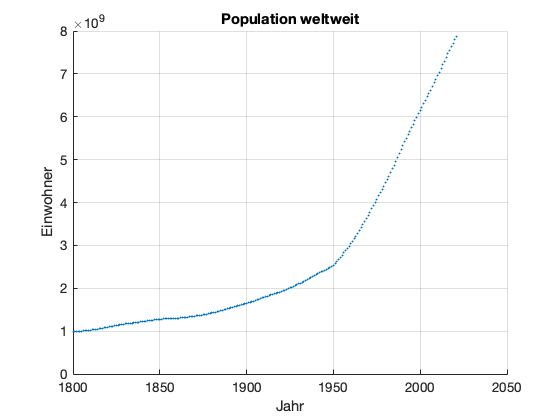

In [7]:
population = readtable('population_world.csv');

% Selektion der Daten
x = population{:, 'Jahr'};
y = population{:, 'Population'};

% Visualisierung
figure()
scatter(x,y, 3, 'filled');
grid on;
xlabel('Jahr'); ylabel('Einwohner');
title('Population weltweit');

Als nächstes möchten wir ein exponentielles Wachstumsmodell $p(t)=p_0\cdot e^{\alpha t}$ anpassen. Daher logarithmieren wir die Anzahl der Einwohner.

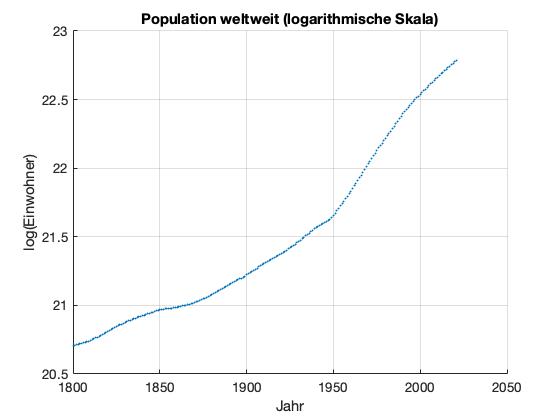

In [8]:
y_log = log(y);

% Visualisierung
figure();
scatter(x,y_log, 3, 'filled');
grid on;
xlabel('Jahr'); ylabel('log(Einwohner)');
title('Population weltweit (logarithmische Skala)');

Jetzt können wir eine Regressiongerade fitten.

Wachstumskonstante alpha = 0.0093
Anfangsgröße p0_log = 3.6752
R2-Bestimmtheitsmaß: 0.9303


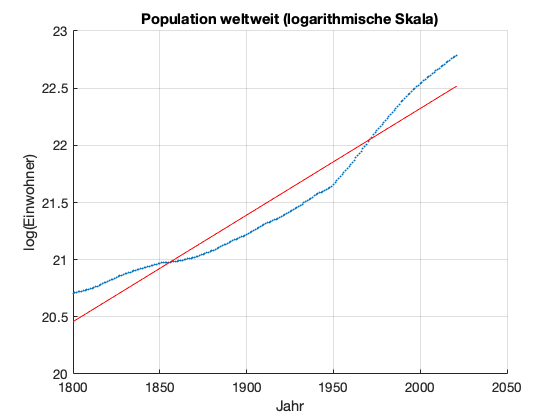

In [14]:
% Regressiongerade an die logarithmierten Daten fitten:
regressiongerade = polyfit(x, y_log, 1);
alpha  = regressiongerade(1);
p0_log = regressiongerade(2);
fprintf('Wachstumskonstante alpha = %.4f\n',alpha);
fprintf('Anfangsgröße p0_log = %.4f\n',p0_log);

% R2-Score bestimmen:
y_log_modell = p0_log + alpha * x;
fehler_modell = sum( (y_log - y_log_modell).^2 );
y_mittelwert = mean(y_log);
fehler_mittelwert = sum( (y_log - y_mittelwert).^2 );

R2 = 1 - fehler_modell / fehler_mittelwert;
fprintf('R2-Bestimmtheitsmaß: %.4f\n', R2);

% Visualisierung Regressionsgerade
figure();
scatter(x,y_log, 3, 'filled');
hold on;
plot(x, y_log_modell, 'r');
grid on;
xlabel('Jahr'); ylabel('log(Einwohner)');
title('Population weltweit (logarithmische Skala)');

Der R2-Score ist mit 0.9303 bzw. 93,03 % sehr gut, wir können also die Regressionsgerade für die logarithmierten Werte verwenden. Jetzt müssen wir die logarithmierten Werte wieder in die normalen Werte übertragen: 

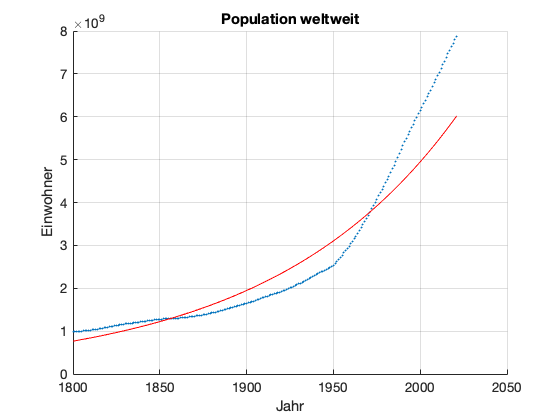

In [15]:
p0 = exp(p0_log);

% Modell exponentielles Wachstum
y_modell = p0 * exp(alpha * x);

% Visualisierung
figure();
scatter(x,y, 3, 'filled');
hold on;
plot(x, y_modell, 'r');
grid on;
xlabel('Jahr'); ylabel('Einwohner');
title('Population weltweit');

## Zusammenfassung

Viele Prozesse in der Natur können durch ein exponentielles Wachstumsgesetz beschrieben werden. Vermutet man einen exponentiellen Prozess, logarithmiert man die y-Werte. Danach wird eine Regressionsgerade an die Messdaten angepasst. Die Steigung der Regressionsgeraden ergibt direkt die Wachstumskonstante. Der y-Achsenabschnitt der Regressionsgeraden muss noch in die (natürliche) Exponentialfunktion eingesetzt werden, was dann die Anfangsgröße ergibt.